IMPORTING IMPORTANT LIBRARIES

In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px

In [43]:
df =pd.read_csv('Movies-India.csv')
df.head(10)

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),2019.0,109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,2021.0,90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,2019.0,110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,2010.0,105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali
5,...Aur Pyaar Ho Gaya,1997.0,147 min,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,...Yahaan,2005.0,142 min,"Drama, Romance, War",7.4,"1,086",Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
7,.in for Motion,2008.0,59 min,Documentary,NaN,NaN,Anirban Datta,NaN,NaN,NaN
8,?: A Question Mark,2012.0,82 min,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia
9,@Andheri,2014.0,116 min,"Action, Crime, Thriller",4.0,11,Biju Bhaskar Nair,Augustine,Fathima Babu,Byon


In [44]:
df.shape # how many rows and column exists after drop null values in dataset

(15509, 10)

In [45]:
df.describe()

,Year,Rating
count,14981.000000,7919.000000
mean,1987.012215,5.841621
std,25.416689,1.381777
min,1913.000000,1.100000
25%,1968.000000,4.900000
50%,1991.000000,6.000000
75%,2009.000000,6.800000
max,2022.000000,10.000000


In [46]:
df.isnull().sum() # to check whether null value exists or not 

Name           0
Year         528
Duration    8269
Genre       1877
Rating      7590
Votes       7589
Director     525
Actor 1     1617
Actor 2     2384
Actor 3     3144
dtype: int64

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  float64
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(2), object(8)
memory usage: 1.2+ MB


In [48]:
# Create a new DataFrame for the genre data
genre_data = df[['Genre']].copy()
genre_data.dropna(subset=['Genre'], inplace=True)
all_genres = ",".join(genre_data['Genre'].tolist())
genre_list = all_genres.split(",")
unique_genres = set(genre.strip() for genre in genre_list)
unique_genres = list(unique_genres)
print(unique_genres)

['Animation', 'Romance', 'Short', 'RealityTV', 'News', 'SciFi', 'War', 'Thriller', 'Fantasy', 'Documentary', 'Horror', 'Action', 'Drama', 'Music', 'Crime', 'Musical', 'Biography', 'History', 'Comedy', 'Sport', 'Family', 'Mystery', 'Adventure', 'Western']


In [49]:
df['Genre'] = df['Genre'].str.split(', ')
genre_data = df.explode('Genre')
genre_counts = genre_data['Genre'].value_counts().reset_index()
genre_counts.columns = ['Genre', 'Count']
genre_mean_ratings = genre_data.groupby('Genre')['Rating'].mean().reset_index()
genre_mean_ratings.columns = ['Genre', 'Mean Rating']
genre_stats = pd.merge(genre_counts, genre_mean_ratings, on='Genre')
print(genre_stats)

          Genre  Count  Mean Rating
0         Drama   7243     5.998558
1        Action   3543     5.430365
2       Romance   2449     5.750533
3        Comedy   2029     5.737290
4      Thriller   1713     5.536187
5         Crime   1322     5.727813
6        Family    943     6.195173
7       Musical    589     6.156627
8     Adventure    541     5.816839
9        Horror    524     4.785000
10      Mystery    513     5.801892
11      Fantasy    458     5.819512
12  Documentary    383     7.613287
13    Biography    208     6.819718
14      History    207     6.804688
15    Animation    125     5.956164
16        Music     90     6.137705
17        Sport     70     6.494118
18        SciFi     58     5.272973
19          War     47     6.041176
20         News      9     7.250000
21      Western      5     5.566667
22    RealityTV      3          NaN
23        Short      1          NaN


In [50]:
df.describe(include='O')

,Name,Duration,Genre,Votes,Director,Actor 1,Actor 2,Actor 3
count,15509,7240,13632,7920,14984,13892,13125,12365
unique,13837,182,485,2034,5938,4718,4891,4820
top,Anjaam,120 min,[Drama],8,Jayant Desai,Ashok Kumar,Rekha,Pran
freq,7,240,2780,227,58,158,83,91


In [51]:
df=df.dropna(subset=['Rating'])  # remove missing values in rating column
df.reset_index(drop=True,inplace=True)  # after that reset the index

In [52]:
df.isnull().sum()

Name           0
Year           0
Duration    2068
Genre        102
Rating         0
Votes          0
Director       5
Actor 1      125
Actor 2      200
Actor 3      292
dtype: int64

In [53]:
df.dtypes

Name         object
Year        float64
Duration     object
Genre        object
Rating      float64
Votes        object
Director     object
Actor 1      object
Actor 2      object
Actor 3      object
dtype: object

In [54]:
# remove null values from columns
df.dropna(subset=['Name', 'Year', 'Duration', 'Rating', 'Votes', 'Director', 'Actor 1', 'Actor 2', 'Actor 3'], inplace=True)

In [55]:
# change data types of following column with respect to required
df['Year'] = df['Year'].astype(int)
df['Duration'] = df['Duration'].str.replace(r'\D', '', regex=True).astype(float)
df['Votes'] = df['Votes'].str.replace(',', '', regex=True).astype(int)

In [56]:
median=df['Duration'].median()  # fill median value instead of null
df['Duration'].fillna(median,inplace=True)

In [57]:
df.dtypes  # after convert data types of servel columns

Name         object
Year          int32
Duration    float64
Genre        object
Rating      float64
Votes         int32
Director     object
Actor 1      object
Actor 2      object
Actor 3      object
dtype: object

In [58]:
df.describe(include="O")

,Name,Genre,Director,Actor 1,Actor 2,Actor 3
count,5688,5659,5688,5688,5688,5688
unique,5410,376,2438,1974,2336,2572
top,Zindagi,[Drama],David Dhawan,Amitabh Bachchan,Rekha,Pran
freq,4,844,41,104,52,57


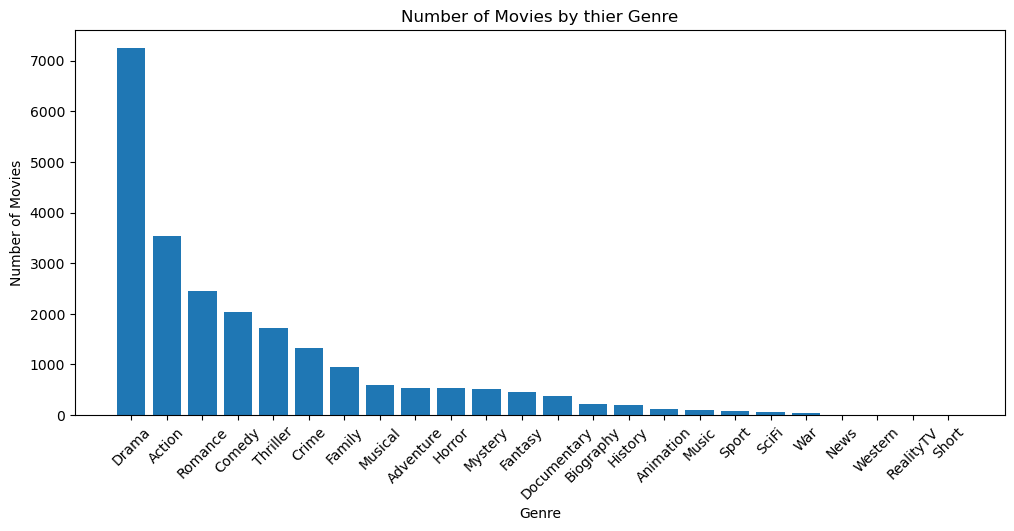

In [59]:
# plot bar graph for showing number of movies by their genre
genre_stats = genre_stats.sort_values(by='Count', ascending=False)  
plt.figure(figsize=(12, 5))
plt.bar(genre_stats['Genre'], genre_stats['Count']) # Create a bar plot
plt.xlabel('Genre')
plt.ylabel('Number of Movies')
plt.title('Number of Movies by thier Genre')
plt.xticks(rotation=45) 
plt.show()

In [60]:
# # The Highest Rating Movie
df.loc[df['Rating']==df['Rating'].max()]  

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
4365,Love Qubool Hai,2020,94.0,"[Drama, Romance]",10.0,5,Saif Ali Sayeed,Ahaan Jha,Mahesh Narayan,Rajasree Rajakumari


In [61]:
# The Lowest Rating Movie
df.loc[(df['Rating'].min()==df['Rating'])] 

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
6238,Sadak 2,2020,133.0,"[Action, Drama]",1.1,67785,Mahesh Bhatt,Alia Bhatt,Priyanka Bose,Sanjay Dutt


In [62]:
# top 10 high rated Movies
Movies = df[(df['Rating']>=7)]['Name']
Movies1=  df.groupby(Movies)['Rating'].mean().sort_values(ascending =False)
x=Movies1.head(10)
x 

Name
Love Qubool Hai        10.0
Half Songs              9.7
Gho Gho Rani            9.4
The Reluctant Crime     9.4
June                    9.4
Secrets of Sinauli      9.3
Sindhustan              9.3
Love Sorries            9.3
Refl3ct                 9.3
God of gods             9.3
Name: Rating, dtype: float64

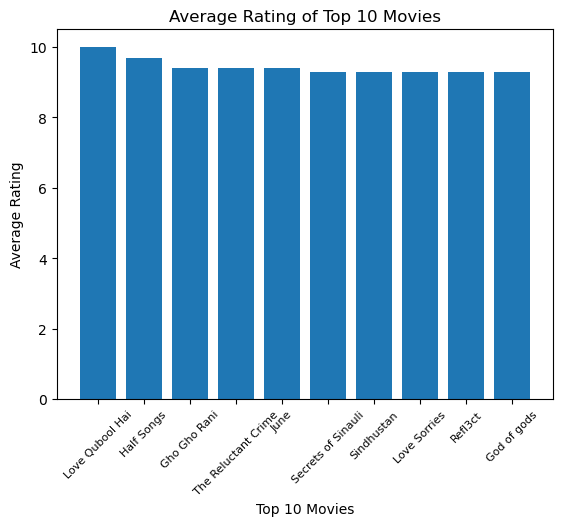

In [63]:
plt.bar(x.index,x.values)
plt.xlabel("Top 10 Movies")
plt.ylabel("Average Rating")
plt.title("Average Rating of Top 10 Movies")
plt.xticks(rotation=45, fontsize=8)
plt.show()

In [64]:
# The Most frequent actor who work in movies with respect to actor 1
actor=df['Actor 1'].value_counts().sort_values(ascending=False)
actor.head(10)

Amitabh Bachchan      104
Mithun Chakraborty     93
Ashok Kumar            91
Dharmendra             90
Jeetendra              89
Akshay Kumar           82
Shashi Kapoor          81
Rajesh Khanna          74
Ajay Devgn             70
Sanjay Dutt            61
Name: Actor 1, dtype: int64

In [65]:
# The Most frequent actor who work in movies with respect to actor 2
actor=df['Actor 2'].value_counts().sort_values(ascending=False)
actor.head(10)

Rekha                 52
Hema Malini           48
Dharmendra            38
Mithun Chakraborty    38
Juhi Chawla           34
Akshay Kumar          34
Sharmila Tagore       32
Shabana Azmi          31
Sunil Shetty          28
Raveena Tandon        28
Name: Actor 2, dtype: int64

In [66]:
# The Most frequent actor who work in movies with respect to actor 3
actor=df['Actor 3'].value_counts().sort_values(ascending=False)
actor.head(10)

Pran                  57
Anupam Kher           51
Prem Chopra           32
Paresh Rawal          30
Mithun Chakraborty    29
Shatrughan Sinha      28
Amrish Puri           26
Om Puri               26
Asrani                26
Aruna Irani           24
Name: Actor 3, dtype: int64

In [67]:
# The most frequent actors who work together in movies
actors = df[['Actor 1', 'Actor 2', 'Actor 3']].value_counts().sort_values(ascending=False)
actors.head(10)

Actor 1           Actor 2        Actor 3       
Anil Kapoor       Sridevi        Anupam Kher       3
Dibakar Banerjee  Karan Johar    Anurag Kashyap    3
Dharmendra        Sunny Deol     Bobby Deol        3
Nargis            Pradeep Kumar  Pran              2
Sunny Deol        Anil Kapoor    Sridevi           2
Devika Rani       Ashok Kumar    Kamta Prasad      2
Dharmendra        Saira Banu     Feroz Khan        2
Manoj Kumar       Hema Malini    Prem Nath         2
Shashi Kapoor     Govinda        Neelam Kothari    2
Rishi Kapoor      Zeba Bakhtiar  Ashwini Bhave     2
dtype: int64

In [68]:
# top 10 high rated actors in actor list 1
actors = df[(df['Rating']>=7)]['Actor 1']
actors1=  df.groupby(actors)['Rating'].mean().sort_values(ascending =False)
y=actors1.head(10)
y

Actor 1
Ahaan Jha            10.0
Raj Banerjee          9.7
Nishi Neha Mishra     9.4
Dharmendra Ahir       9.4
Vaibhav Khisti        9.4
Vishwa Bhanu          9.3
Kunj Anand            9.3
Vijay Mahar           9.3
Leila Advani          9.3
Tejaswini Manogna     9.3
Name: Rating, dtype: float64

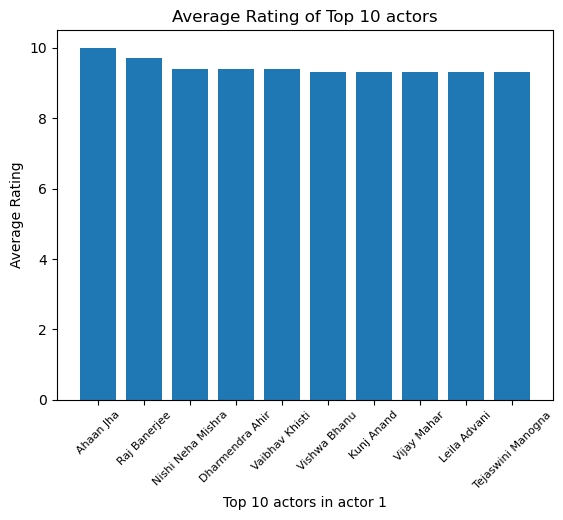

In [69]:
plt.bar(y.index,y.values)
plt.xlabel("Top 10 actors in actor 1")
plt.ylabel("Average Rating")
plt.title("Average Rating of Top 10 actors")
plt.xticks(rotation=45, fontsize=8)
plt.show()

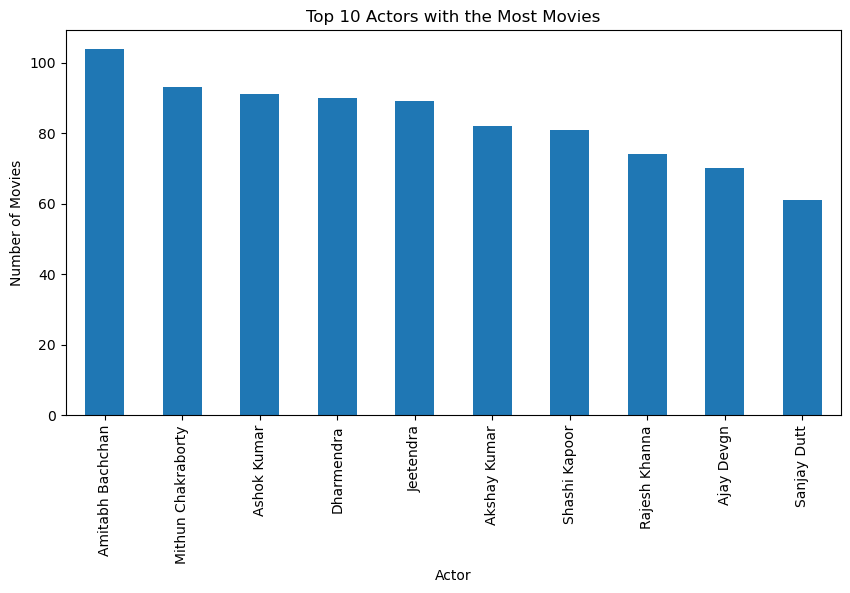

In [70]:
# plot graph for the top 10 actors from actor list_1 with the most movies
top_actors = df['Actor 1'].value_counts().sort_values(ascending=False).head(10)
plt.figure(figsize=(10, 5))
top_actors.plot(kind='bar')
plt.title('Top 10 Actors with the Most Movies')
plt.xlabel('Actor')
plt.ylabel('Number of Movies')
plt.xticks(rotation=90)  
plt.show()

In [71]:
# top 10 high rated directors
directors = df[(df['Rating']>=7)]['Director']
directors1=  df.groupby(directors)['Rating'].mean().sort_values(ascending =False)
z=directors1.head(10)
z

Director
Saif Ali Sayeed    10.0
Sriram Raja         9.7
Arvind Pratap       9.4
Suhrud Godbole      9.4
Munni Pankaj        9.4
Rahul Mallick       9.3
Raghav Jairath      9.3
Nikhil Mahar        9.3
Venkatesh Bk        9.3
Gautam Joshi        9.3
Name: Rating, dtype: float64

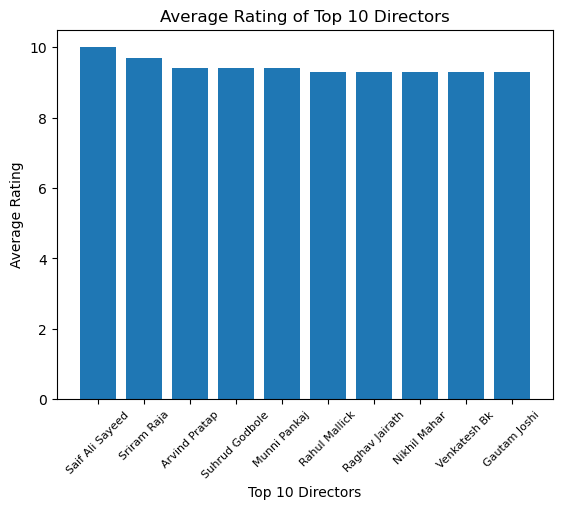

In [72]:
plt.bar(z.index,z.values)
plt.xlabel("Top 10 Directors")
plt.ylabel("Average Rating")
plt.title("Average Rating of Top 10 Directors")
plt.xticks(rotation=45, fontsize=8)
plt.show()

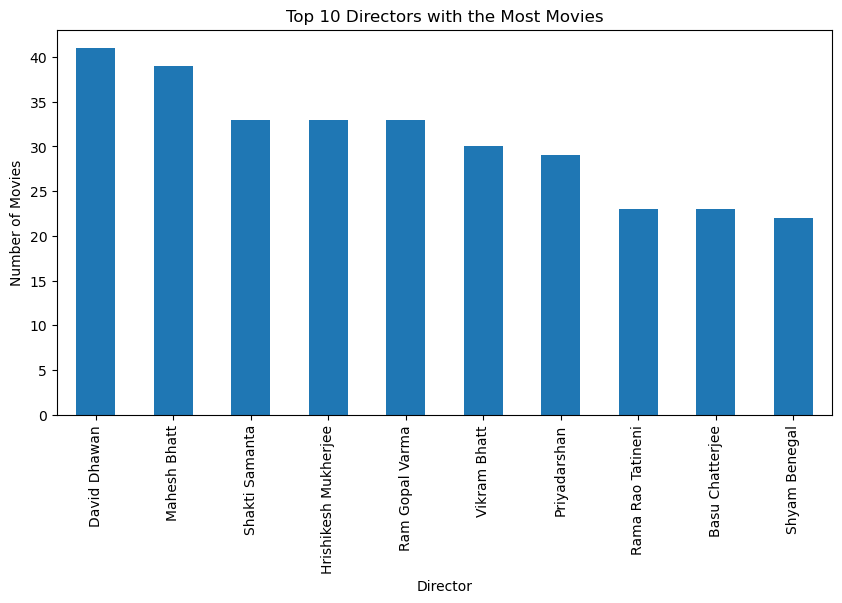

In [73]:
# plot graph for the top 10 directors with the most movies
top_directors = df['Director'].value_counts().sort_values(ascending=False).head(10)
plt.figure(figsize=(10, 5))
top_directors.plot(kind='bar')
plt.title('Top 10 Directors with the Most Movies')
plt.xlabel('Director')
plt.ylabel('Number of Movies')
plt.xticks(rotation=90)  
plt.show()

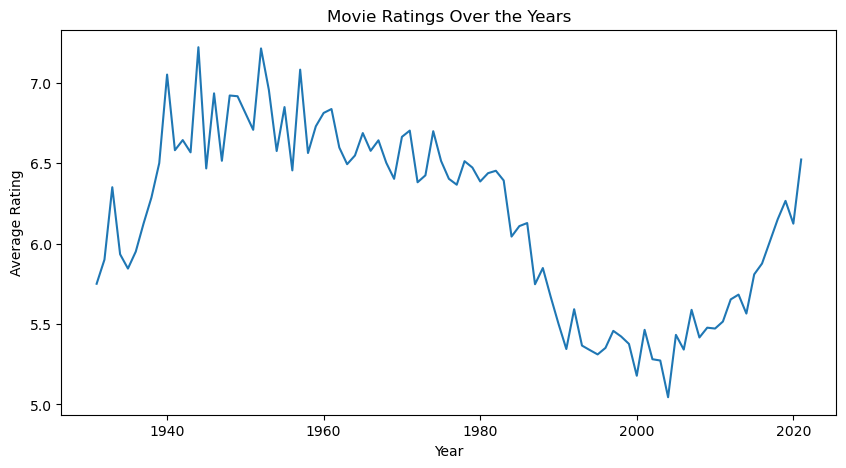

In [74]:
# plot movie rating over the years
ratings_year = df.groupby('Year')['Rating'].mean()
plt.figure(figsize=(10, 5))
plt.plot(ratings_year.index, ratings_year.values)
plt.title('Movie Ratings Over the Years')
plt.xlabel('Year')
plt.ylabel('Average Rating')
plt.show() 

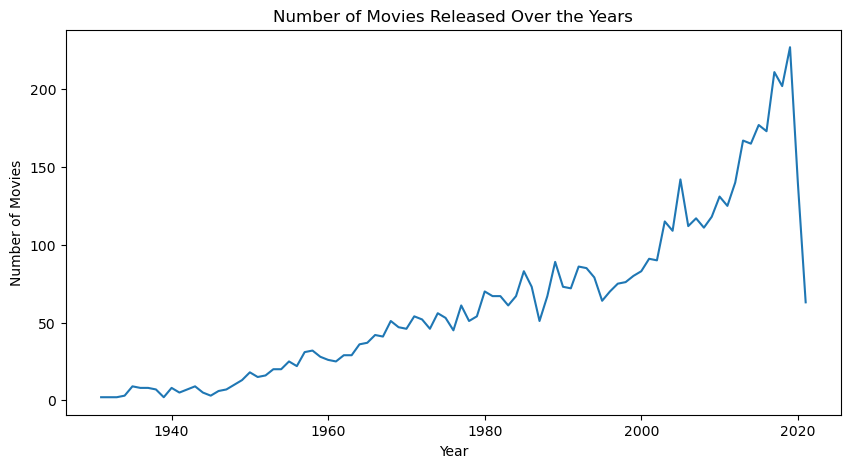

In [75]:
movies_year = df.groupby('Year').size()
plt.figure(figsize=(10, 5))
plt.plot(movies_year.index, movies_year.values)
plt.title('Number of Movies Released Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Movies')
plt.show()

Predictive analysis

In [76]:
# importing libraries for predictive analysis
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, mean_absolute_error, mean_squared_error, r2_score

In [77]:
# data preprocessing
datamodel = df[['Year', 'Votes', 'Duration', 'Director','Actor 1', 'Actor 2', 'Actor 3', 'Rating']]

In [78]:
# feature Engineering
director_mean_rating = datamodel.groupby('Director')['Rating'].transform('mean')
datamodel['Director_encoded'] = director_mean_rating

actor1_mean_rating = datamodel.groupby('Actor 1')['Rating'].transform('mean')
datamodel['Actor1_encoded'] = actor1_mean_rating

actor2_mean_rating = datamodel.groupby('Actor 2')['Rating'].transform('mean')
datamodel['Actor2_encoded'] = actor2_mean_rating

actor3_mean_rating = datamodel.groupby('Actor 3')['Rating'].transform('mean')
datamodel['Actor3_encoded'] = actor3_mean_rating

C:\Users\shyam\AppData\Local\Temp\ipykernel_19884\20585449.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datamodel['Director_encoded'] = director_mean_rating


In [79]:
#splitting data into trainning n testing 
X = datamodel[[ 'Year', 'Votes', 'Duration','Director_encoded','Actor1_encoded', 'Actor2_encoded', 'Actor3_encoded']]
y = datamodel['Rating']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=24)

In [80]:
#Linear Regression
lr = LinearRegression()
lr.fit(X_train,y_train)
lr_pred = lr.predict(X_test)

#Random Forest
rf = RandomForestRegressor()
rf.fit(X_train,y_train)
rf_pred = rf.predict(X_test)

In [81]:
print('Logistic Regression Model Performance: ')
print('Mean squared error: ',mean_squared_error(y_test, lr_pred))
print('Mean absolute error: ',mean_absolute_error(y_test, lr_pred))
print('R2 score: ',r2_score(y_test, lr_pred))
print()

print('Random Forest Regressor Model Performance: ')
print('Mean squared error: ',mean_squared_error(y_test, rf_pred))
print('Mean absolute error: ',mean_absolute_error(y_test, rf_pred))
print('R2 score: ',r2_score(y_test, rf_pred))

Logistic Regression Model Performance: 
Mean squared error:  0.3776196295816832
Mean absolute error:  0.45627603129950006
R2 score:  0.8033009447842607

Random Forest Regressor Model Performance: 
Mean squared error:  0.3192714569420035
Mean absolute error:  0.3918412419449326
R2 score:  0.8336940428456718


In [82]:
data = {'Year': [2016], 'Votes': [58], 'Duration': [121], 'Director_encoded': [5.8], 'Actor1_encoded': [5.9], 'Actor2_encoded': [5.9], 'Actor3_encoded': [5.900]}
df = pd.DataFrame(data)

predicted_rating = rf.predict(df)

# Display the predicted rating
print("Predicted Rating:", predicted_rating[0])

Predicted Rating: 5.909999999999996
